<a href="https://colab.research.google.com/github/jason96819/Classification-of-soccer-player-types/blob/main/Data%20collection%2C%20refining%2C%20and%20preprocessing/4_0__%EA%B3%A8%EA%B8%B0%ED%8D%BC_%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('2_군집전데이터_1701_28.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,출전시간,득점,도움,슈팅,스로인,드리블 시도,키패스,전방 패스 시도,후방 패스 시도,횡패스 시도,...,경합 공중 시도,태클 시도,클리어링,인터셉트,차단,획득,블락,파울,피파울,Position
0,386,3,0,11,3,16,1,24,19,48,...,12,10,3,6,6,24,8,11,10,FW
1,541,1,0,6,0,3,4,69,54,44,...,17,13,9,14,14,39,15,11,10,MF
2,3287,12,13,64,5,46,78,293,327,432,...,41,83,22,35,29,200,45,23,20,FW
3,2941,0,1,21,0,7,9,392,265,585,...,99,73,116,100,74,215,96,38,34,MF
4,694,0,1,9,1,5,4,166,83,132,...,18,19,10,22,14,74,18,11,17,MF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,285,0,1,0,16,2,4,104,41,70,...,4,1,5,3,12,27,2,2,3,DF
1697,1671,5,6,27,0,35,30,146,151,264,...,76,13,6,29,30,106,0,29,20,FW
1698,2456,1,0,11,2,1,4,581,80,532,...,121,22,72,53,134,221,15,42,18,DF
1699,624,0,0,1,46,3,0,161,85,90,...,7,2,4,7,19,41,0,15,8,DF


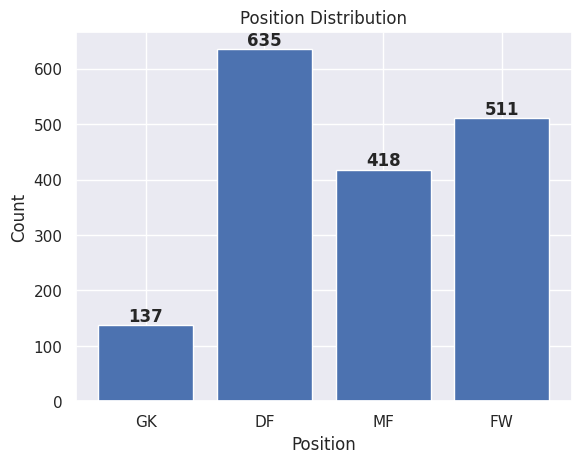

In [ ]:
sns.set(style='darkgrid')

counts = df['Position'].value_counts().loc[['GK', 'DF', 'MF', 'FW']]

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('Position Distribution')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['출전시간', '득점', '도움', '슈팅', '스로인', '드리블 시도', '키패스', '전방 패스 시도',
       '후방 패스 시도', '횡패스 시도', '공격지역패스 시도', '수비지역패스 시도', '중앙지역패스 시도', '롱패스 시도',
       '중거리패스 시도', '숏패스 시도', '크로스 시도', '경합 지상 시도', '경합 공중 시도', '태클 시도', '클리어링',
       '인터셉트', '차단', '획득', '블락', '파울', '피파울', 'Position'],
      dtype='object')

In [ ]:
df.columns = ['Time', 'Goal', 'Ass', 'Shoot', 'Throw', 'Dribble', 'KPass', 'FP', 'BP', 'CP',
                      'AP', 'DP', 'MP', 'LP', 'MiP', 'SP', 'Cross', 'RG', 'RS', 'Takkle', 'Clearing',
                      'Intercept', 'Cut', 'Acq', 'Block', 'Foul', 'Fouled', 'Position']

In [ ]:
df.to_csv('군집에필요한데이터및영어.csv')

# GK 군집

In [ ]:
GK = df[df['Position'] == 'GK']
GK

,Time,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,...,RS,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled,Position
14,3341,0,0,0,0,0,0,689,0,76,...,0,1,41,148,3,56,6,0,9,GK
27,2216,0,0,0,0,0,0,463,0,181,...,0,1,16,101,1,45,4,2,5,GK
47,1737,0,0,0,0,0,0,358,0,218,...,0,1,30,66,1,36,4,1,2,GK
55,480,0,0,0,0,0,0,81,0,34,...,0,0,7,19,0,8,0,0,0,GK
71,686,0,0,0,0,0,0,93,0,136,...,0,0,7,25,1,15,0,0,1,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,2592,0,0,0,0,0,0,466,0,133,...,0,2,13,6,8,136,0,0,2,GK
1645,2408,0,0,1,0,0,0,570,0,107,...,1,1,19,4,4,169,0,0,4,GK
1660,865,0,0,0,0,0,0,198,0,16,...,0,0,4,0,1,43,0,0,0,GK
1676,1729,0,0,0,0,0,1,386,0,18,...,0,1,17,6,6,91,0,1,2,GK


In [ ]:
temp_GK = GK

In [ ]:
temp_GK = temp_GK.reset_index(drop=True).drop(columns=['Position'])

In [ ]:
for i in range(len(temp_GK)):
    x = temp_GK.Time[i] / 60
    temp_GK.iloc[i, :] /= x
temp_GK = temp_GK.drop(columns=['Time'])
temp_GK

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,AP,...,RG,RS,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled
0,0.0,0.000000,0.000000,0.0,0.0,0.000000,12.373541,0.0,1.364861,0.0,...,0.017959,0.000000,0.017959,0.736306,2.657887,0.053876,1.005687,0.107752,0.000000,0.161628
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,12.536101,0.0,4.900722,0.0,...,0.000000,0.000000,0.027076,0.433213,2.734657,0.027076,1.218412,0.108303,0.054152,0.135379
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,12.366149,0.0,7.530225,0.0,...,0.034542,0.000000,0.034542,1.036269,2.279793,0.034542,1.243523,0.138169,0.034542,0.069085
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,10.125000,0.0,4.250000,0.0,...,0.000000,0.000000,0.000000,0.875000,2.375000,0.000000,1.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.0,0.000000,8.134111,0.0,11.895044,0.0,...,0.000000,0.000000,0.000000,0.612245,2.186589,0.087464,1.311953,0.000000,0.000000,0.087464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.0,0.000000,0.000000,0.0,0.0,0.000000,10.787037,0.0,3.078704,0.0,...,0.023148,0.000000,0.046296,0.300926,0.138889,0.185185,3.148148,0.000000,0.000000,0.046296
133,0.0,0.000000,0.024917,0.0,0.0,0.000000,14.202658,0.0,2.666113,0.0,...,0.024917,0.024917,0.024917,0.473422,0.099668,0.099668,4.210963,0.000000,0.000000,0.099668
134,0.0,0.000000,0.000000,0.0,0.0,0.000000,13.734104,0.0,1.109827,0.0,...,0.000000,0.000000,0.000000,0.277457,0.000000,0.069364,2.982659,0.000000,0.000000,0.000000
135,0.0,0.000000,0.000000,0.0,0.0,0.034702,13.395026,0.0,0.624639,0.0,...,0.034702,0.000000,0.034702,0.589936,0.208213,0.208213,3.157895,0.000000,0.034702,0.069404


In [ ]:
temp1 = temp_GK

전체 데이터 분포 확인

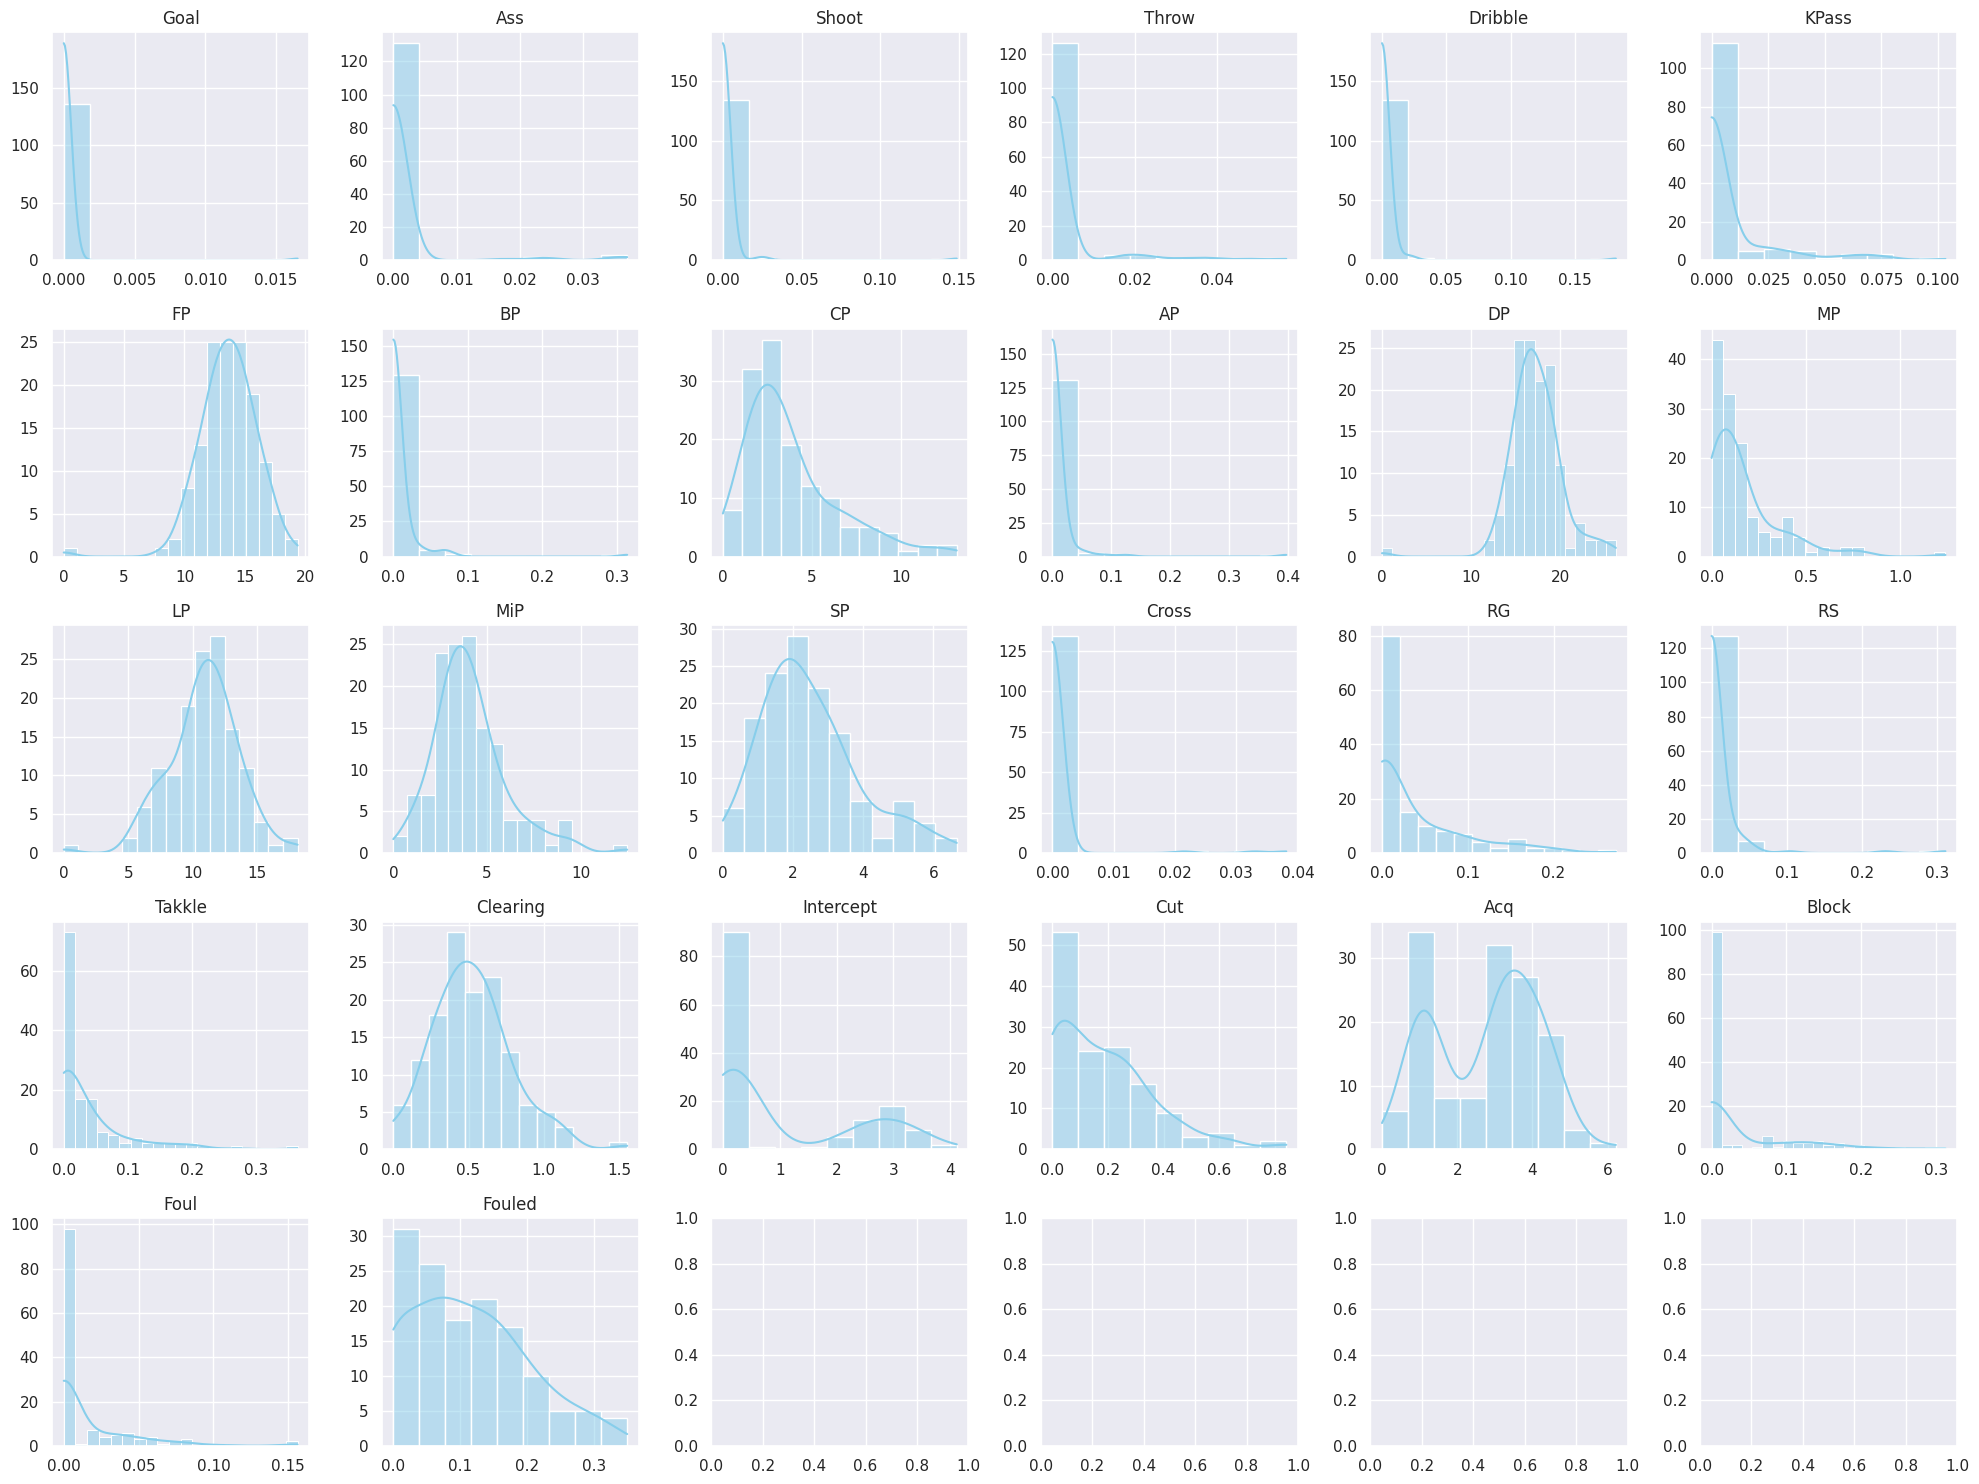

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_GK.columns):
    sns.histplot(data=temp_GK[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

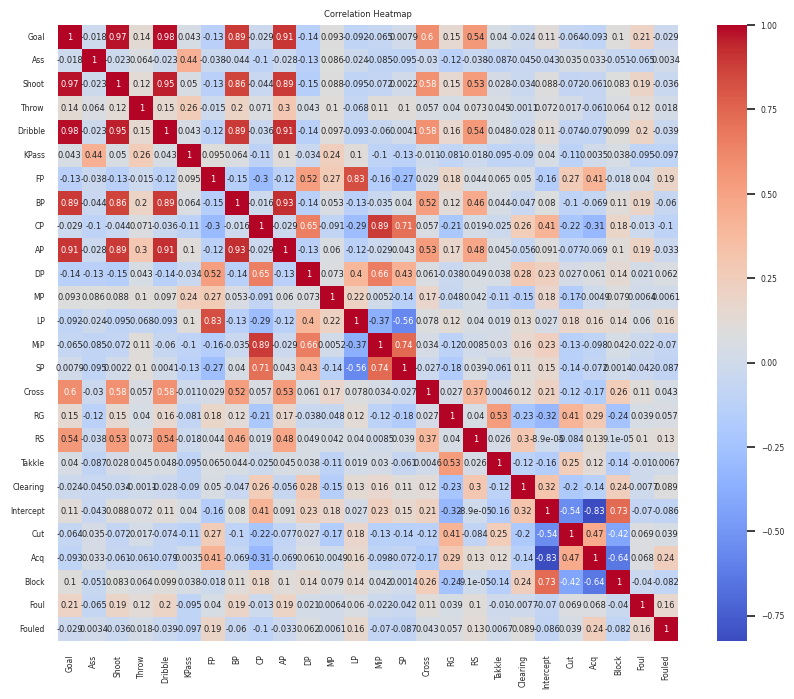

In [ ]:
# 상관관계 분석
corr = temp_GK.corr()

# 히트맵 그리기
sns.set(font_scale=0.5)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

도메인 지식 이용: 축구 경험이 있거나 축구에 대한 전문 지식을 가지고 있다면, 어떤 속성이 선수 역할에 가장 영향을 미치는지 예측할 수 있습니다. 이를 바탕으로 일부 속성을 선택할 수 있습니다.

골기퍼와 스위퍼 골기퍼를 나누는 기준 : 차단, 전방 패스

In [ ]:
temp_GK = temp_GK[['LP', 'FP']]

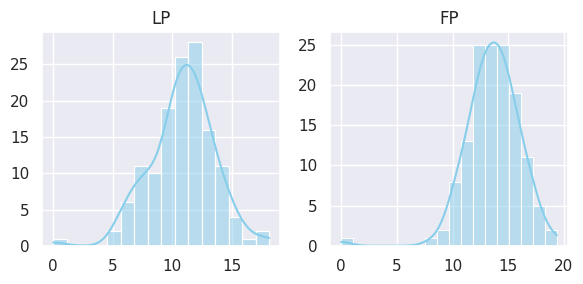

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_GK.columns):
    sns.histplot(data=temp_GK[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# 제곱근 변환 함수 정의
def sqrt_transform(x):
    return np.sqrt(x)

def exp_transform(x):
    return x**2

In [ ]:
for i in range(len(temp_GK.columns)):
    if temp_GK.columns[i] == 'Cut':
        temp_GK[temp_GK.columns[i]] = temp_GK[temp_GK.columns[i]].apply(sqrt_transform)
    else:
        temp_GK[temp_GK.columns[i]] = temp_GK[temp_GK.columns[i]].apply(exp_transform)

<ipython-input-42-c2e90f16ba77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_GK[temp_GK.columns[i]] = temp_GK[temp_GK.columns[i]].apply(exp_transform)


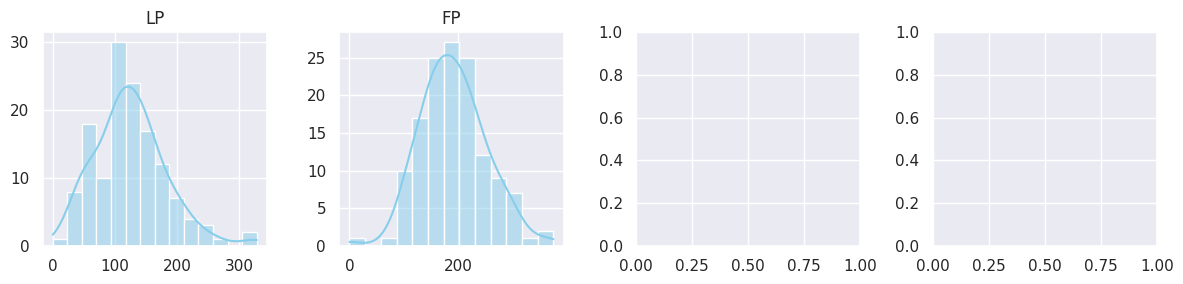

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_GK.columns):
    sns.histplot(data=temp_GK[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### 군집화 수행

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km_GK = KMeans(n_clusters=2)
km_GK.fit(temp_GK)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
temp_GK['Detailed Role'] = km_GK.labels_

<ipython-input-46-0c291ab8f9f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_GK['Detailed Role'] = km_GK.labels_


In [ ]:
temp_GK[temp_GK['Detailed Role']==0].describe()                                                                               #SGK

,LP,FP,Detailed Role
count,46.000000,46.000000,46.0
mean,185.244390,255.432443,0.0
std,44.335365,39.967126,0.0
min,127.018992,198.079561,0.0
25%,154.964891,228.806775,0.0
50%,172.060293,247.861023,0.0
75%,203.138954,273.413931,0.0
max,328.515625,375.390625,0.0


In [ ]:
temp_GK[temp_GK['Detailed Role']==1].describe()                                                                               #GK

,LP,FP,Detailed Role
count,91.000000,91.000000,91.0
mean,94.719603,158.901062,1.0
std,34.687303,39.392019,0.0
min,0.000000,0.000000,1.0
25%,66.062028,138.596765,1.0
50%,102.163713,162.925507,1.0
75%,122.162082,186.826007,1.0
max,148.569418,231.766540,1.0


In [ ]:
temp_GK['Detailed Role'] = km_GK.labels_

<ipython-input-49-0c291ab8f9f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_GK['Detailed Role'] = km_GK.labels_


In [ ]:
temp_GK

,LP,FP,Detailed Role
0,135.007567,153.104513,1
1,85.746263,157.153830,1
2,124.482387,152.921630,1
3,102.515625,102.515625,1
4,30.362349,66.163758,1
...,...,...,...
132,36.501736,116.360168,1
133,110.040797,201.715489,1
134,140.689766,188.625614,1
135,138.392295,179.426722,1


In [ ]:
temp_GK['Detailed Role'][temp_GK['Detailed Role'] == 0] = 'Swiper goalkeeper'
temp_GK['Detailed Role'][temp_GK['Detailed Role'] == 1] = 'Goalkeeper'

<ipython-input-51-0727739af107>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_GK['Detailed Role'][temp_GK['Detailed Role'] == 0] = 'Swiper goalkeeper'
<ipython-input-51-0727739af107>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_GK['Detailed Role'][temp_GK['Detailed Role'] == 1] = 'Goalkeeper'


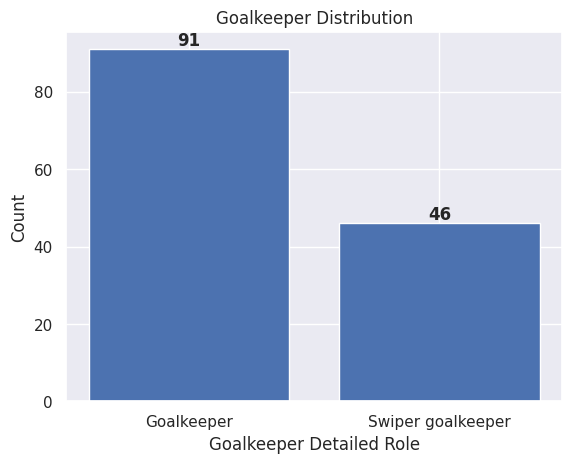

In [ ]:
sns.set(style='darkgrid')

counts = temp_GK['Detailed Role'].value_counts().loc[['Goalkeeper', 'Swiper goalkeeper']]

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('Goalkeeper Distribution')
plt.xlabel('Goalkeeper Detailed Role')
plt.ylabel('Count')
plt.show()

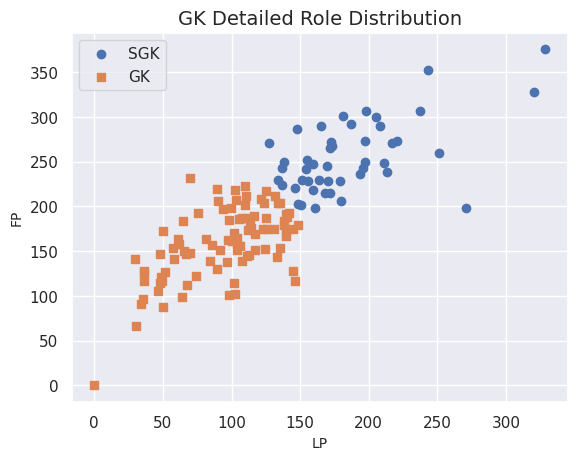

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp_GK[temp_GK['Detailed Role']=='Swiper goalkeeper'].index
marker1 = temp_GK[temp_GK['Detailed Role']=='Goalkeeper'].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp_GK.loc[marker0, 'LP'], y=temp_GK.loc[marker0, 'FP'], marker='o', label='SGK')
plt.scatter(x=temp_GK.loc[marker1, 'LP'], y=temp_GK.loc[marker1, 'FP'], marker='s', label='GK')

plt.xlabel('LP', fontsize=10)
plt.ylabel('FP', fontsize=10)
plt.title('GK Detailed Role Distribution', fontsize=14)
plt.legend()
plt.show()

# 실루엣 계수 구하기

In [ ]:
temp_GK

,LP,FP,Detailed Role
0,135.007567,153.104513,Goalkeeper
1,85.746263,157.153830,Goalkeeper
2,124.482387,152.921630,Goalkeeper
3,102.515625,102.515625,Goalkeeper
4,30.362349,66.163758,Goalkeeper
...,...,...,...
132,36.501736,116.360168,Goalkeeper
133,110.040797,201.715489,Goalkeeper
134,140.689766,188.625614,Goalkeeper
135,138.392295,179.426722,Goalkeeper


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
score_samples = silhouette_samples(temp_GK[['LP', 'FP']], temp_GK['Detailed Role'])
score_samples.shape

(137,)

In [ ]:
temp_GK['silhouette_coeff'] = score_samples
average_score = silhouette_score(temp_GK[['LP', 'FP']], temp_GK['Detailed Role'])
np.round(average_score, 4)

<ipython-input-57-19d933b8efd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_GK['silhouette_coeff'] = score_samples


0.4957

In [ ]:
temp_GK.groupby('Detailed Role')['silhouette_coeff'].mean()

Detailed Role
Goalkeeper           0.508319
Swiper goalkeeper    0.470617
Name: silhouette_coeff, dtype: float64

# 저장

In [ ]:
GK['Role'] = 'GK'
GK['Detailed Role'] = km_GK.labels_
GK['Detailed Role'][GK['Detailed Role'] == 0] = 'Swiper goalkeeper'
GK['Detailed Role'][GK['Detailed Role'] == 1] = 'Goalkeeper'
GK = GK[['Role', 'Detailed Role']]

<ipython-input-59-19d6708401d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GK['Role'] = 'GK'
<ipython-input-59-19d6708401d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GK['Detailed Role'] = km_GK.labels_
<ipython-input-59-19d6708401d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GK['Detailed Role'][GK['Deta

In [ ]:
GK

,Role,Detailed Role
14,GK,Goalkeeper
27,GK,Goalkeeper
47,GK,Goalkeeper
55,GK,Goalkeeper
71,GK,Goalkeeper
...,...,...
1627,GK,Goalkeeper
1645,GK,Goalkeeper
1660,GK,Goalkeeper
1676,GK,Goalkeeper


In [ ]:
GK.to_csv('GK.csv')